In [33]:
import pandas as pd
import pickle as pkl
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, classification_report, fbeta_score, confusion_matrix

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
model = pkl.load(open('D:/Ineuron/Project_workshop/Lead_Scoring_/Models/Logistic_regression_1.pkl', 'rb'))

test = pd.read_csv('D:/Ineuron/Project_workshop/Lead_Scoring_/Data/TestCluster_1_dataframe.csv')

train = pd.read_csv('D:/Ineuron/Project_workshop/Lead_Scoring_/Data/TrainCluster_1_dataframe.csv')

In [36]:
x_train = train.drop(columns=['cluster', 'target'], axis='columns')
y_train = train['target']

In [37]:
x_test = test.drop(columns=['cluster', 'target'], axis='columns')
y_test = test['target']

In [38]:
train.shape

(23602, 36)

In [39]:
test.shape

(1243, 36)

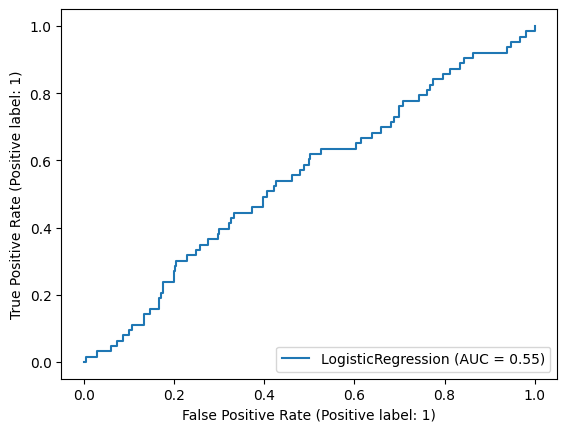

In [40]:
plot_roc_curve(model, x_test, y_test)

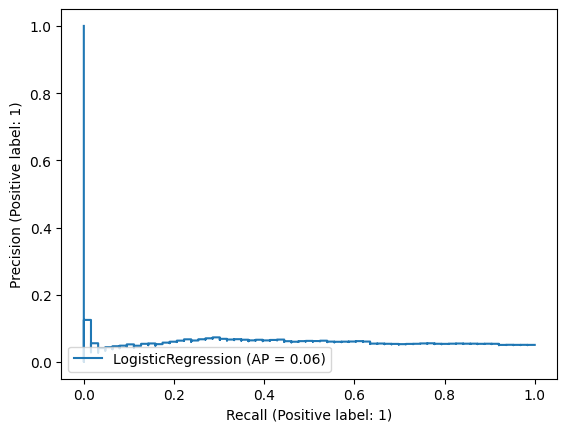

In [41]:
plot_precision_recall_curve(model, x_test, y_test)

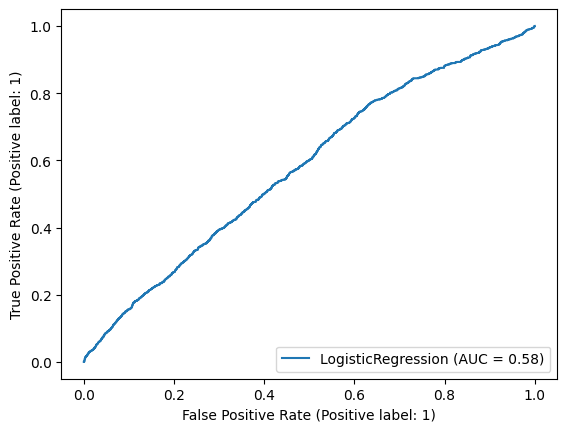

In [42]:
plot_roc_curve(model, x_train, y_train)

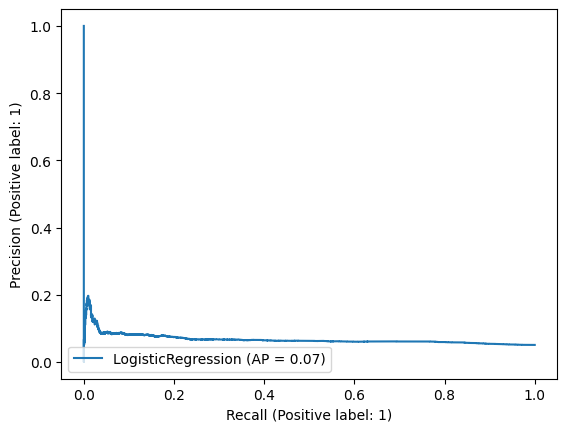

In [43]:
plot_precision_recall_curve(model, x_train, y_train)

In [44]:
pred_train = model.predict(x_train)

In [45]:
print(f"ROC_Score is : {roc_auc_score(y_train, pred_train)}")
print(f"Recall is : {recall_score(y_train, pred_train)}")
print(f"Accuracy is : {accuracy_score(y_train, pred_train)}")
print(f"F2_score is : {fbeta_score(y_train, pred_train, beta=2)}")

ROC_Score is : 0.545435249255919
Recall is : 0.3768844221105528
Accuracy is : 0.6969324633505635
F2_score is : 0.19338203695745598


In [46]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     22408
           1       0.07      0.38      0.11      1194

    accuracy                           0.70     23602
   macro avg       0.51      0.55      0.46     23602
weighted avg       0.91      0.70      0.78     23602



In [47]:
print(confusion_matrix(y_train, pred_train))

[[15999  6409]
 [  744   450]]


In [48]:
pred_proba_train = model.predict_proba(x_train)

In [49]:
pred_proba_train

array([[0.63528232, 0.36471768],
       [0.84313691, 0.15686309],
       [0.43638572, 0.56361428],
       ...,
       [0.60295513, 0.39704487],
       [0.56965055, 0.43034945],
       [0.56527948, 0.43472052]])

In [50]:
pred_proba_train

k = []
for i in pred_proba_train[:,1]:
    if 0<i<=0.3:
        k.append('Cold lead')
    elif 0.3<i<=0.6:
        k.append('Warm lead')
    elif 0.6<i<=1:
        k.append('Hot lead')
        



In [51]:
k.count('Cold lead')

7439

In [52]:
k.count('Warm lead')

15379

In [53]:
k.count('Hot lead')

784

In [54]:
train.target.value_counts()

0    22408
1     1194
Name: target, dtype: int64

In [55]:
pred_test = model.predict(x_test)

In [56]:
print(f"ROC_Score is : {roc_auc_score(y_test, pred_test)}")
print(f"Recall is : {recall_score(y_test, pred_test)}")
print(f"Accuracy is : {accuracy_score(y_test, pred_test)}")
print(f"F2_score is : {fbeta_score(y_test, pred_test, beta=2)}")

ROC_Score is : 0.5350820554210385
Recall is : 0.36507936507936506
Accuracy is : 0.6878519710378117
F2_score is : 0.18459069020866772


In [57]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1180
           1       0.06      0.37      0.11        63

    accuracy                           0.69      1243
   macro avg       0.51      0.54      0.46      1243
weighted avg       0.91      0.69      0.78      1243



In [58]:
print(confusion_matrix(y_test, pred_test))

[[832 348]
 [ 40  23]]


In [59]:
pred_proba_test = model.predict_proba(x_test)

In [60]:
pred_proba_test

array([[0.47860226, 0.52139774],
       [0.43910027, 0.56089973],
       [0.84176445, 0.15823555],
       ...,
       [0.56896193, 0.43103807],
       [0.51075415, 0.48924585],
       [0.55308541, 0.44691459]])

In [61]:
l = []
for i in pred_proba_test[:,1]:
    if 0<i<=0.3:
        l.append('Cold lead')
    elif 0.3<i<=0.6:
        l.append('Warm lead')
    elif 0.6<i<=1:
        l.append('Hot lead')



In [66]:
l.count('Cold lead')

402

In [67]:
l.count('Warm lead')

801

In [68]:
l.count('Hot lead')

40

In [65]:
test.target.value_counts()

0    1180
1      63
Name: target, dtype: int64